In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [2]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

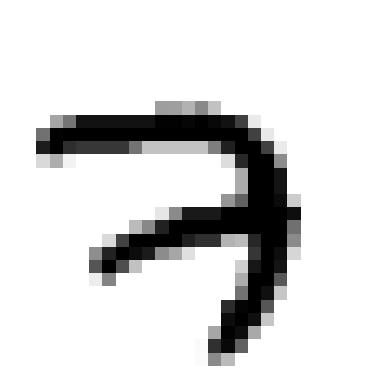

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

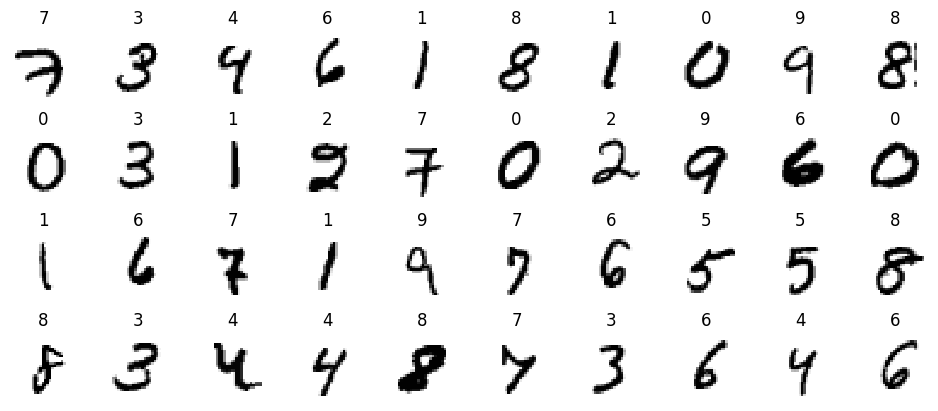

In [6]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [8]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      


2024-05-21 00:42:03.708959: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-21 00:42:03.709357: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-21 00:42:03.709377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-05-21 00:42:03.710058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2024-05-21 00:42:14.044645: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1711/1719 [============================>.] - ETA: 0s - loss: 0.6119 - accuracy: 0.8439

2024-05-21 00:42:18.948952: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 5s 3ms/step - loss: 0.6106 - accuracy: 0.8442 - val_loss: 0.3038 - val_accuracy: 0.9164
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.9186 - val_loss: 0.2395 - val_accuracy: 0.9338
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9334 - val_loss: 0.1997 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2012 - accuracy: 0.9428 - val_loss: 0.1782 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1761 - accuracy: 0.9497 - val_loss: 0.1592 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1567 - accuracy: 0.9551 - val_loss: 0.1460 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1408 - accuracy: 0.9602 - val_loss: 0.1348 - val_accuracy: 0.9632
Epo

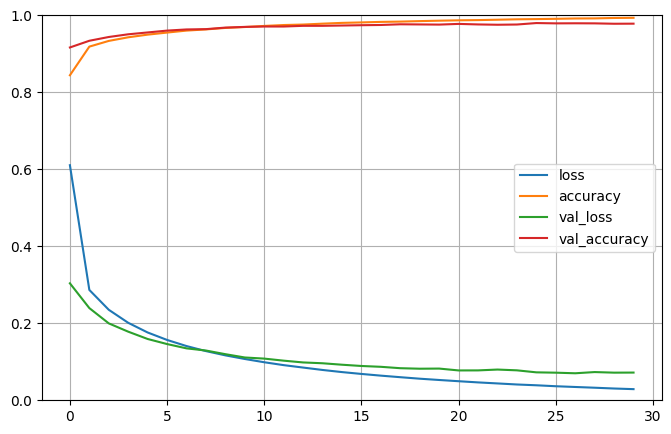

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

 19/313 [>.............................] - ETA: 0s - loss: 0.0598 - accuracy: 0.9852 

2024-05-21 00:44:42.048066: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9777


[0.0720667690038681, 0.9776999950408936]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 131ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

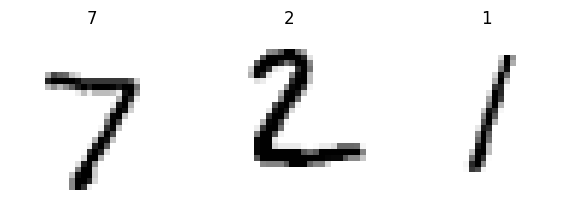

In [14]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

In [16]:
activation_functions = ["relu", "elu", "LeakyReLU"]

In [22]:
models_history = []

for activation in activation_functions:
    model = Sequential([
        Flatten(input_shape=[28, 28]),
        Dense(300, activation=activation),
        Dense(100, activation=activation),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    models_history.append((model, history))
    print(f'finished {activation}')

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6043 - accuracy: 0.8473 - val_loss: 0.2994 - val_accuracy: 0.9198
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2826 - accuracy: 0.9203 - val_loss: 0.2353 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2305 - accuracy: 0.9340 - val_loss: 0.1957 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1962 - accuracy: 0.9439 - val_loss: 0.1740 - val_accuracy: 0.9538
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1714 - accuracy: 0.9513 - val_loss: 0.1551 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1520 - accuracy: 0.9571 - val_loss: 0.1424 - val_accuracy: 0.9632
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1361 - accuracy: 0.9617 - val_loss: 0.1307 - val_accurac

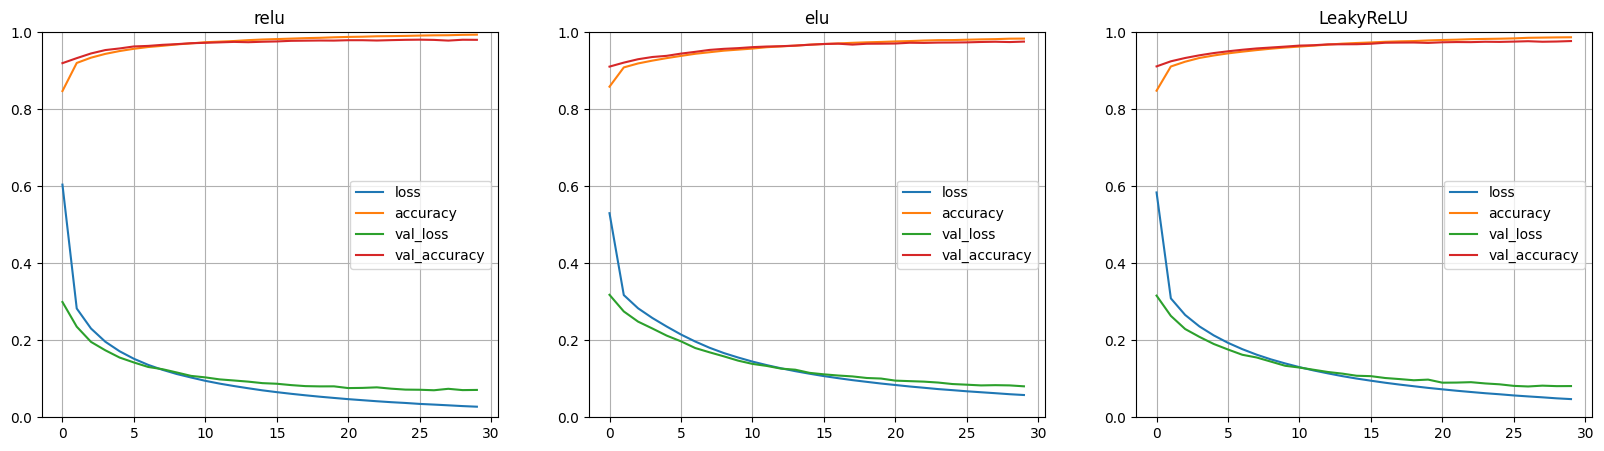

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, (model, history) in enumerate(models_history):
    pd.DataFrame(history.history).plot(ax=axs[i])
    axs[i].set_title(activation_functions[i])
    axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()

In [25]:
df = pd.DataFrame(columns=["activation", "accuracy"])

for i, (model, history) in enumerate(models_history):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)  
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    df.loc[i] = [activation_functions[i], accuracy]

df

313/313 [==============================] - 1s 4ms/step


,activation,accuracy
0,relu,0.9778
1,elu,0.9749
2,LeakyReLU,0.9749


# Zad. 
Stwórz wykres porównujący metody. 

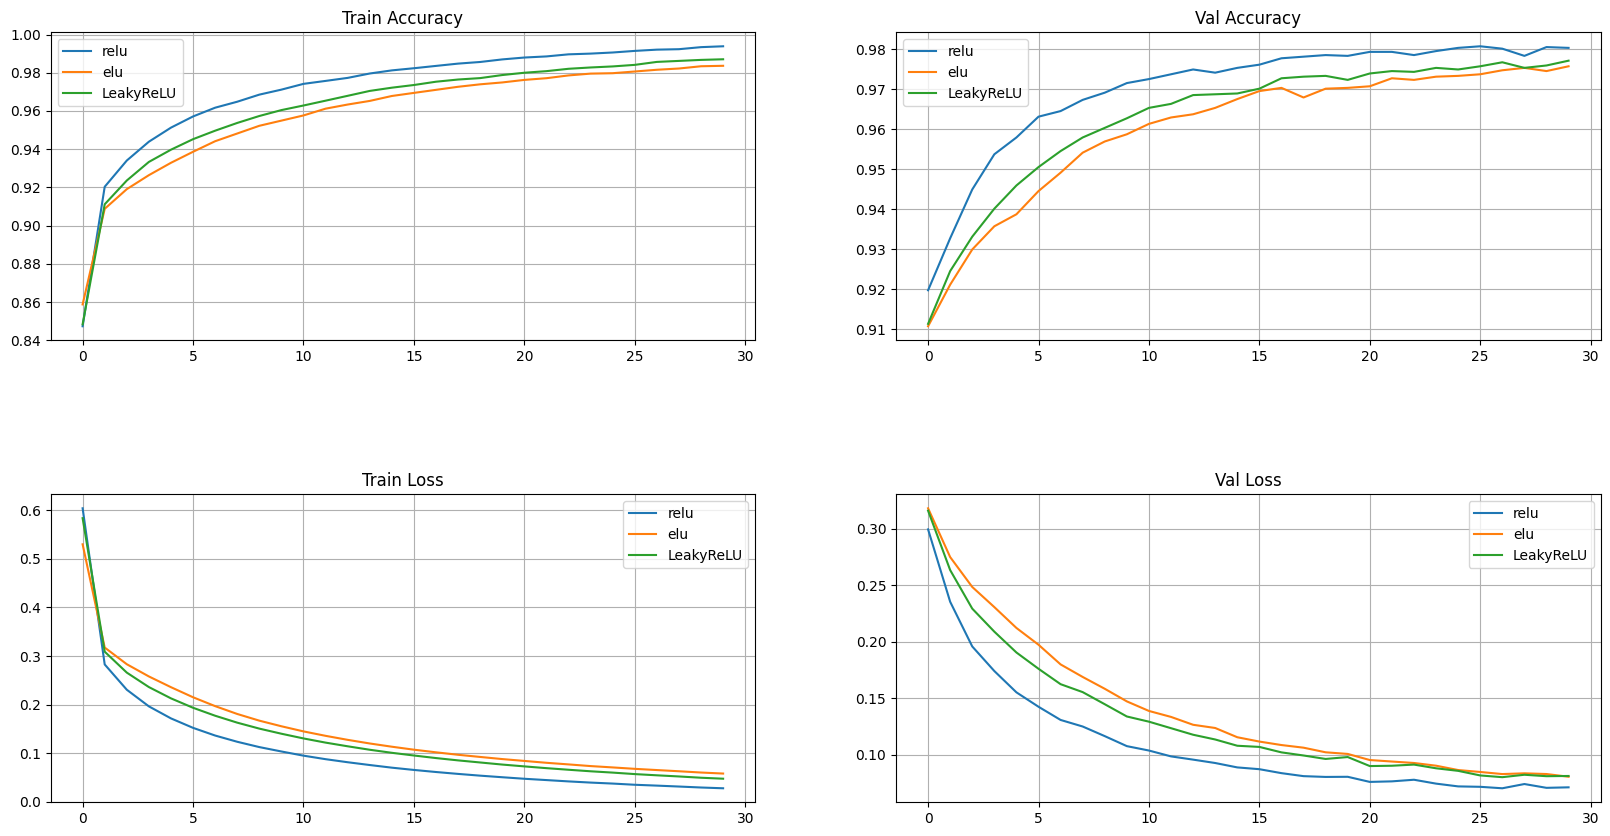

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (_, history) in enumerate(models_history):
    axs[0][0].plot(history.history['accuracy'], label=f'{activation_functions[i]}')
    axs[0][1].plot(history.history['val_accuracy'], label=f'{activation_functions[i]}')
    axs[1][0].plot(history.history['loss'], label=f'{activation_functions[i]}')
    axs[1][1].plot(history.history['val_loss'], label=f'{activation_functions[i]}')

axs[0][0].set_title('Train Accuracy')
axs[0][1].set_title('Val Accuracy')
axs[1][0].set_title('Train Loss')
axs[1][1].set_title('Val Loss')

for ax in axs.flatten():
    ax.legend()
    ax.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()